**Package import**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

**Dataset import**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/RBL Project/Cleveland.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,22.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Dataset correlation visualization**

<ipython-input-8-c3a0ea5e9d39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = data.corr()


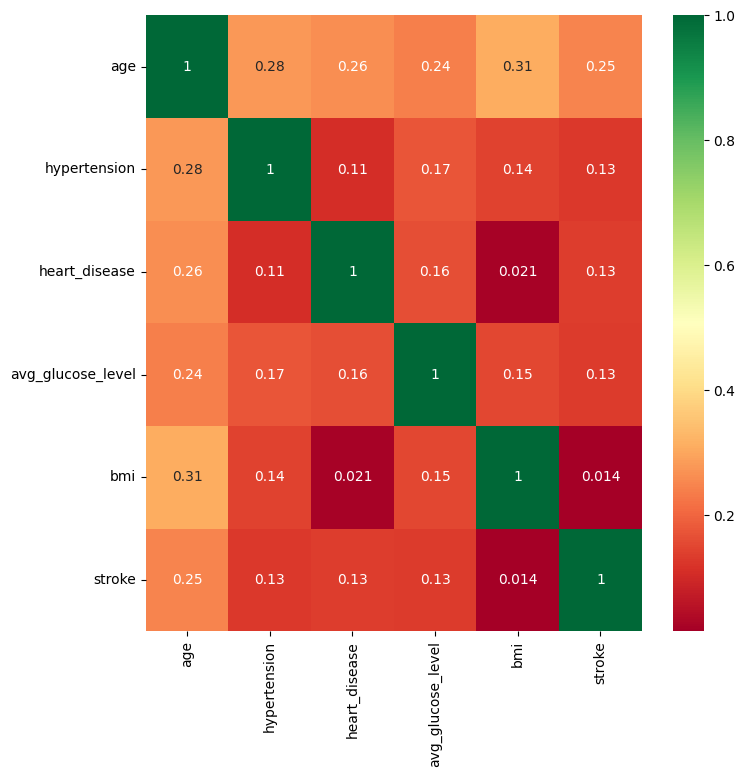

In [ ]:
data = data.iloc[:, 1:]
cormat = data.corr()
top_cor_features = cormat.index
plt.figure(figsize = (8,8))
g = sns.heatmap(data[top_cor_features].corr(), annot = True, cmap = "RdYlGn")

**Feature selection**

In [ ]:
# Chi-Square test
contingency_table = pd.crosstab(data['stroke'], data['smoking_status'])
stat, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", stat)
print("p-value:", p)
print("Degrees of freedom:", dof)

# High chi-square statistic value,  low p-value shows the potential relation
# among the features.

Chi-square statistic: 29.147269191399264
p-value: 2.0853997025008455e-06
Degrees of freedom: 3


In [ ]:
X = data[['age', 'gender', 'hypertension', 'heart_disease', 'ever_married',
          'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = data['stroke']

**One hot encoding**

In [ ]:
X = pd.get_dummies(X, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
y = to_categorical(y)

**Dataset splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Defining neural network architecture**

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(y_train.shape[1], activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Training and evaluation**

In [ ]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

Epoch 1/50
112/112 [==============================] - 1s 2ms/step - loss: 1.0409 - accuracy: 0.9061
Epoch 2/50
112/112 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9536
Epoch 3/50
112/112 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.9519
Epoch 4/50
112/112 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9502
Epoch 5/50
112/112 [==============================] - 0s 3ms/step - loss: 0.1986 - accuracy: 0.9483
Epoch 6/50
112/112 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9474
Epoch 7/50
112/112 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.9466
Epoch 8/50
112/112 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9533
Epoch 9/50
112/112 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.9525
Epoch 10/50
112/112 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9525

**Validation check**

Epoch 1/50
112/112 [==============================] - 0s 4ms/step - loss: 0.1511 - accuracy: 0.9558 - val_loss: 0.1827 - val_accuracy: 0.9406
Epoch 2/50
112/112 [==============================] - 0s 4ms/step - loss: 0.1561 - accuracy: 0.9525 - val_loss: 0.1983 - val_accuracy: 0.9348
Epoch 3/50
112/112 [==============================] - 0s 4ms/step - loss: 0.1517 - accuracy: 0.9528 - val_loss: 0.2241 - val_accuracy: 0.9419
Epoch 4/50
112/112 [==============================] - 0s 4ms/step - loss: 0.1564 - accuracy: 0.9525 - val_loss: 0.1948 - val_accuracy: 0.9432
Epoch 5/50
112/112 [==============================] - 0s 4ms/step - loss: 0.1501 - accuracy: 0.9553 - val_loss: 0.1856 - val_accuracy: 0.9380
Epoch 6/50
112/112 [==============================] - 0s 4ms/step - loss: 0.1537 - accuracy: 0.9516 - val_loss: 0.1931 - val_accuracy: 0.9419
Epoch 7/50
112/112 [==============================] - 0s 3ms/step - loss: 0.1523 - accuracy: 0.9522 - val_loss: 0.1985 - val_accuracy: 0.9413
Epoch 

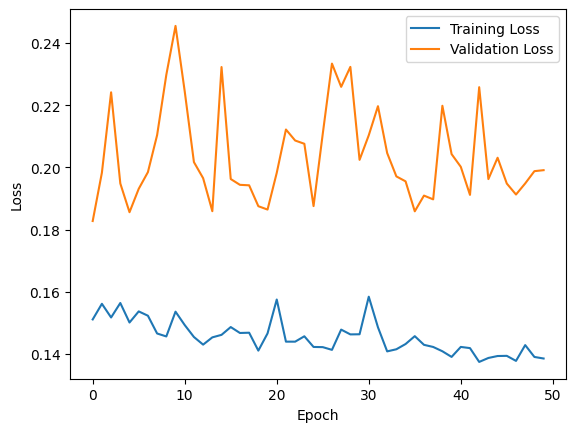

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Performance visualization**

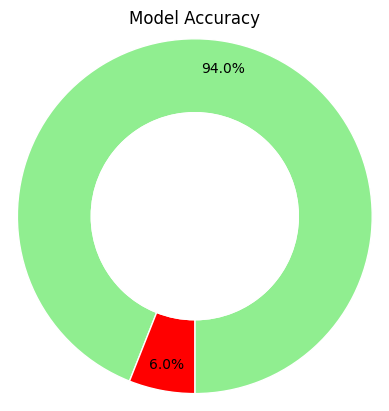

In [ ]:
accuracy = [94, 6]
colors = ['#90EE90', 'red']

fig, ax = plt.subplots()

ax.pie(accuracy, colors = colors, autopct = '%1.1f%%', startangle = 270,
       pctdistance = 0.85, radius = 1.2, wedgeprops = dict(width = 0.5, edgecolor = 'w'))

circle = plt.Circle((0,0), 0.7, color = 'white')
fig.gca().add_artist(circle)

ax.set_title('Model Accuracy')

plt.show()